In [159]:
import nltk
nltk.download('words')
from nltk.corpus import words
import pandas as pd
%matplotlib inline
import re

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cernadu01\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# get all words
all_words = words.words()
len_original = len(all_words)
# change the lower case and remove duplicates
all_words = list(set([x.lower() for x in all_words]))
print('removed duplicates: ' + str(len_original - len(all_words)))
print('total words:        ' + str(len(all_words)))

removed duplicates: 2359
total words:        234377


In [60]:
def clean_non_alpha(list_of_words):
    return [x.lower() for x in list(list_of_words) if x.isalpha()]

def deduplicate_word_list(list_of_words):
    return list(set([x.lower() for x in list_of_words]))

def build_letter_frequency_dict(list_of_words):
    frequency_dict = {}
    for word in list_of_words:
        for letter in list(word):
            if letter in frequency_dict.keys():
                frequency_dict[letter] += 1
            else:
                frequency_dict[letter] = 1 
    return frequency_dict

def build_frequency_dict(list_of_elements):
    frequency_dict = {}
    for element in list_of_elements:
        if element in frequency_dict.keys():
            frequency_dict[element] += 1
        else:
            frequency_dict[element] = 1 
    return frequency_dict

def plot_frequency(frequency_dict, top_n = 30, order_by_freq = False):
    data = pd.DataFrame.from_dict(frequency_dict,orient='index', columns = ['frequency'])
    data.sort_index(inplace = True)
    data.reset_index(inplace = True)
    data.columns = ['element', 'frequency']
    frequencies = sorted(data.frequency.tolist())
    #display(data)
    data = data if len(data) < top_n else data[data.frequency >= frequencies[-top_n]]
    data = data if order_by_freq == False else data.sort_values(by='frequency', ascending=True)
    data.plot(kind='barh', y = 'frequency', x = 'element', figsize = (10,10))

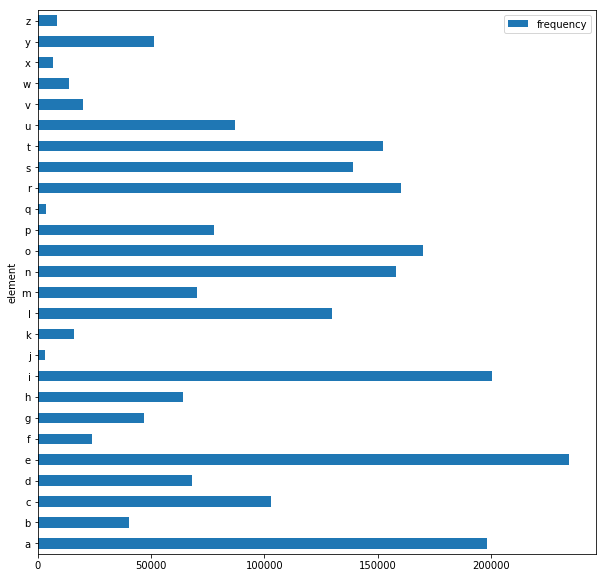

In [48]:
plot_frequency(build_letter_frequency_dict(deduplicate_word_list(clean_non_alpha(all_words))),)

In [ ]:
addtion 1

# NLTK

## data download

In [ ]:
# NLTK Book Collection
# https://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words

In [ ]:
#nltk.download()

In [25]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Searching Text

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing "monstrous" in parentheses:

In [ ]:
text1.concordance("life")

In [ ]:
text1.similar("life")

In [ ]:
text1.similar("monstrous")

In [ ]:
text2.similar("monstrous")

In [ ]:
text2.similar("life")

In [ ]:
text2.common_contexts(["monstrous", "very"])

In [ ]:
text4.dispersion_plot(["life", "ballad", "fire", "woman", "land"])

In [ ]:
text3.dispersion_plot(["life", "ballad", "fire", "woman", "land"])

In [ ]:
text3.generate()

# Counting Vocabulary

In [ ]:
len(text3)

In [ ]:
text3

In [ ]:
text3_list = list(set(text3))

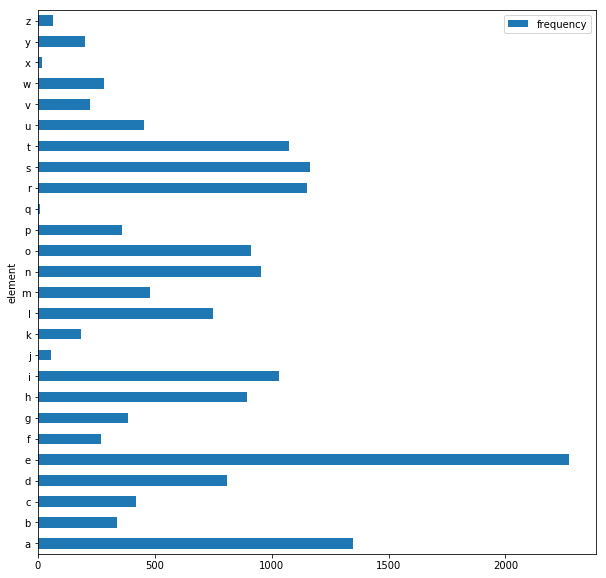

In [49]:
plot_frequency(build_letter_frequency_dict(clean_non_alpha(list(set(text3)))))

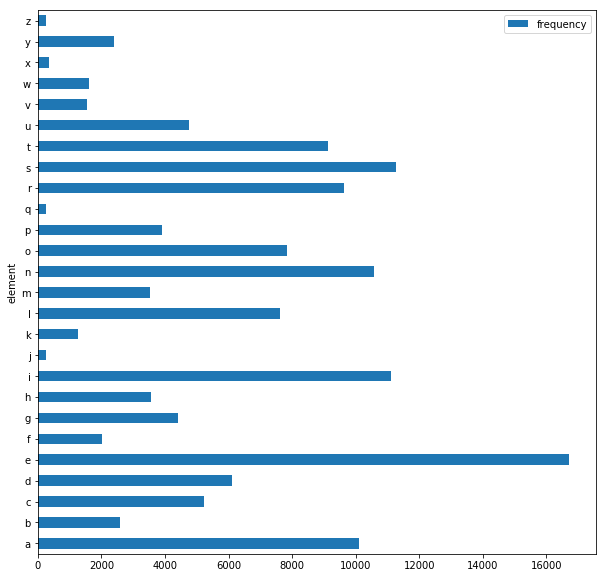

In [50]:
plot_frequency(build_letter_frequency_dict(clean_non_alpha(list(set(text1)))))

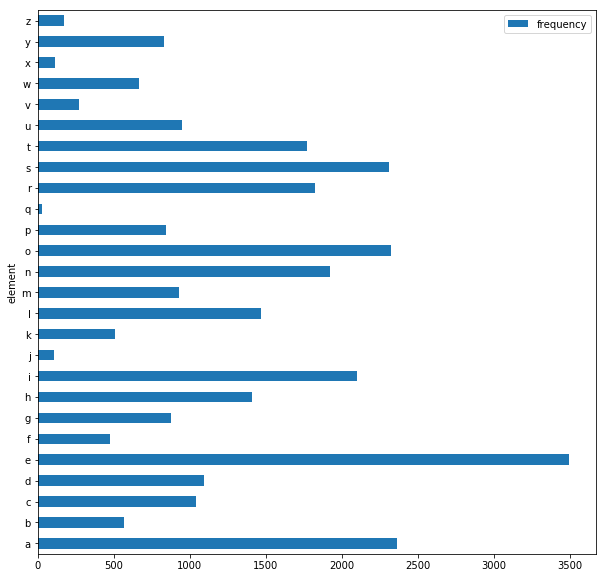

In [51]:
plot_frequency(build_letter_frequency_dict(clean_non_alpha(list(set(text5)))))

## Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [ ]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

In [ ]:
list(bigrams(text3))

In [26]:
a=build_frequency_dict(list(bigrams(text3)))

In [30]:
data = pd.DataFrame.from_dict(a,orient='index', columns = ['frequency'])
data.sort_index(inplace = True)
data.reset_index(inplace = True)
data.columns = ['element', 'frequency']

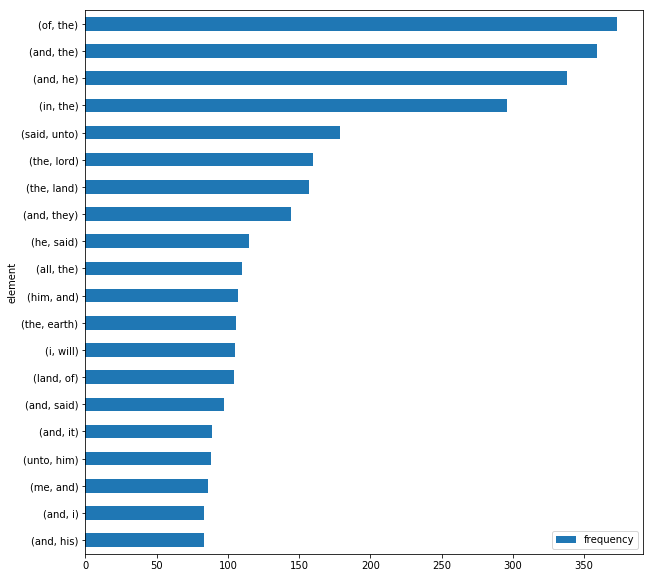

In [61]:
plot_frequency(build_frequency_dict(list(bigrams(clean_non_alpha(text3)))),20,True)

# Gutenberg Corpus


In [ ]:
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

In [ ]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)


In [56]:
#https://www.nltk.org/book/ch02.html

In [76]:
dict([(i, chr(65+i)) for i in range(4)])

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [83]:
for char in 'ab':
    print(char)

a
b


# caesar cipher


## simple shift

In [66]:
plain_alpha = 'abcdefghijklmnopqrstuvwxyz'

In [222]:
def build_cipher_alpha(shift):
    return (plain_alpha[shift:] + plain_alpha[:shift]).upper()

def encrypt(plaintext, shift):
    cipher_alpha = build_cipher_alpha(shift)
    encrypt_cipher = { plain_alpha[i] : cipher_alpha[i] for i in range(len(plain_alpha))}
    return ''.join([encrypt_cipher[x] if x.isalpha() else x for x in plaintext.lower()]).upper()

def decrypt(ciphtertext, shift):
    cipher_alpha = build_cipher_alpha(shift)
    decrypt_cipher = { cipher_alpha[i] : plain_alpha[i] for i in range(len(cipher_alpha))}
    return ''.join([decrypt_cipher[x] if x.isalpha() else x for x in ciphtertext]).lower()

def print_alphabets(shift):
    cipher_alpha = build_cipher_alpha(shift)
    encrypt_cipher = { plain_alpha[i] : cipher_alpha[i] for i in range(len(plain_alpha))}
    decrypt_cipher = { cipher_alpha[i] : plain_alpha[i] for i in range(len(cipher_alpha))}
    display(pd.DataFrame.from_dict({'plain alphabet' : list(encrypt_cipher.keys()), 
                            'cipher alphabet' : list(encrypt_cipher.values())}))
    
def print_all_decryptions(ciphertext):
    for i in range(len(plain_alpha)):
        print(decrypt(ciphertext, i))

In [223]:
plaintext = "something, well, I don't know what?"

In [224]:
ciphertext = encrypt(plaintext, 5)
ciphertext

"XTRJYMNSL, BJQQ, N ITS'Y PSTB BMFY?"

In [225]:
print_all_decryptions(ciphertext)

xtrjymnsl, bjqq, n its'y pstb bmfy?
wsqixlmrk, aipp, m hsr'x orsa alex?
vrphwklqj, zhoo, l grq'w nqrz zkdw?
uqogvjkpi, ygnn, k fqp'v mpqy yjcv?
tpnfuijoh, xfmm, j epo'u lopx xibu?
something, well, i don't know what?
rnldsghmf, vdkk, h cnm's jmnv vgzs?
qmkcrfgle, ucjj, g bml'r ilmu ufyr?
pljbqefkd, tbii, f alk'q hklt texq?
okiapdejc, sahh, e zkj'p gjks sdwp?
njhzocdib, rzgg, d yji'o fijr rcvo?
migynbcha, qyff, c xih'n ehiq qbun?
lhfxmabgz, pxee, b whg'm dghp patm?
kgewlzafy, owdd, a vgf'l cfgo ozsl?
jfdvkyzex, nvcc, z ufe'k befn nyrk?
iecujxydw, mubb, y ted'j adem mxqj?
hdbtiwxcv, ltaa, x sdc'i zcdl lwpi?
gcashvwbu, kszz, w rcb'h ybck kvoh?
fbzrguvat, jryy, v qba'g xabj jung?
eayqftuzs, iqxx, u paz'f wzai itmf?
dzxpestyr, hpww, t ozy'e vyzh hsle?
cywodrsxq, govv, s nyx'd uxyg grkd?
bxvncqrwp, fnuu, r mxw'c twxf fqjc?
awumbpqvo, emtt, q lwv'b svwe epib?
zvtlaopun, dlss, p kvu'a ruvd doha?
yuskznotm, ckrr, o jut'z qtuc cngz?


In [191]:
# TO DO... get a score identifying actual words from non-words?

## with a keyword

In [ ]:
plain_alpha = 'abcdefghijklmnopqrstuvwxyz'

In [160]:
keyword = 'julius caesar'

In [250]:
def build_cipher_alpha(keyword):
    keyword = re.sub(r'\W+', '', keyword)
    cipher_alpha = ''
    for char in keyword:
        char = char.upper()
        if char not in cipher_alpha:
            cipher_alpha += char
    plain_alpha_rest = plain_alpha[plain_alpha.find(cipher_alpha[-1]):]
    for char in plain_alpha_rest:
        char = char.upper()
        if char not in cipher_alpha:
            cipher_alpha += char
    plain_alpha_beginning = plain_alpha[:plain_alpha.find(cipher_alpha[-1])]
    for char in plain_alpha_beginning:
        char = char.upper()
        if char not in cipher_alpha:
            cipher_alpha += char  
    return cipher_alpha

In [251]:
def encrypt(plaintext, keyword):
    cipher_alpha = build_cipher_alpha(keyword)
    encrypt_cipher = { plain_alpha[i] : cipher_alpha[i] for i in range(len(plain_alpha))}
    return ''.join([encrypt_cipher[x] if x.isalpha() else x for x in plaintext.lower()]).upper()

def decrypt(ciphtertext, keyword):
    cipher_alpha = build_cipher_alpha(keyword)
    decrypt_cipher = { cipher_alpha[i] : plain_alpha[i] for i in range(len(cipher_alpha))}
    return ''.join([decrypt_cipher[x] if x.isalpha() else x for x in ciphtertext]).lower()

def print_alphabets(keyword):
    cipher_alpha = build_cipher_alpha(keyword)
    encrypt_cipher = { plain_alpha[i] : cipher_alpha[i] for i in range(len(plain_alpha))}
    decrypt_cipher = { cipher_alpha[i] : plain_alpha[i] for i in range(len(cipher_alpha))}
    display(pd.DataFrame.from_dict({'plain alphabet' : list(encrypt_cipher.keys()), 
                            'cipher alphabet' : list(encrypt_cipher.values())}))


In [252]:
build_cipher_alpha(keyword)

'TESKYWORDZABCFGHIJLMNPQUVX'

In [273]:
plaintext = 'well this time we need something much longer, for the reason of frequency analysis perhaps.'
plaintext

'well this time we need something much longer, for the reason of frequency analysis perhaps.'

In [275]:
keyword = 'testkeyword'

In [279]:
ciphertext = encrypt(plaintext, keyword)
ciphertext

'QYBB MRDL MDCY QY FYYK LGCYMRDFO CNSR BGFOYJ, WGJ MRY JYTLGF GW WJYINYFSV TFTBVLDL HYJRTHL.'

In [256]:
decrypt(ciphtertext, keyword)

'well this time we need something much longer, for the reason of frequency analysis perhaps.'

In [ ]:
aiorn
eiasrn

In [218]:
# TO DO... crack without a keyword

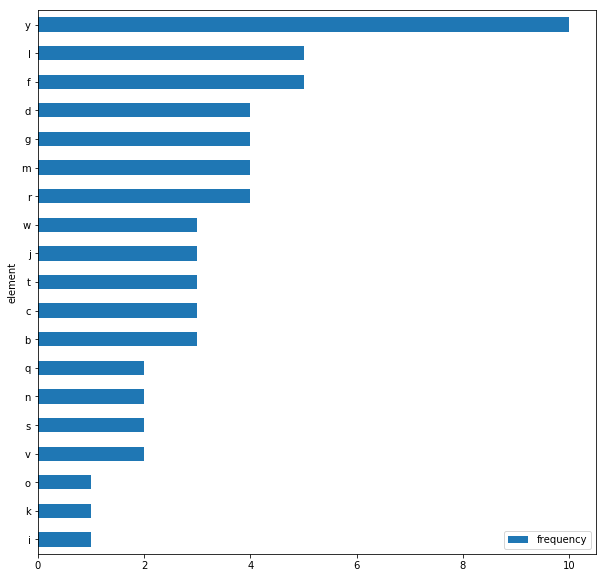

In [261]:
plot_frequency(build_letter_frequency_dict(clean_non_alpha(list(set(ciphtertext.split(' '))))),order_by_freq = True)

In [281]:
cipher_alpha_crack = {plain_alpha[i].upper() :'.' for i in range(len(plain_alpha))}

In [280]:
ciphertext

'QYBB MRDL MDCY QY FYYK LGCYMRDFO CNSR BGFOYJ, WGJ MRY JYTLGF GW WJYINYFSV TFTBVLDL HYJRTHL.'

In [291]:
def show_partial_decryption(ciphertext, cipher_alpha_crack):
    print(ciphertext)
    print(''.join([cipher_alpha_crack[x] if x.isalpha() else x for x in ciphtertext]).lower())

In [351]:
cipher_alpha_crack['Y'] = 'e'
cipher_alpha_crack['L'] = 's'
cipher_alpha_crack['F'] = 'n' #not 'a'
cipher_alpha_crack['K'] = 'd'
cipher_alpha_crack['T'] = 'a'
cipher_alpha_crack['B'] = 'l'
cipher_alpha_crack['V'] = 'y'
cipher_alpha_crack['D'] = 'i'
cipher_alpha_crack['G'] = 'o'
cipher_alpha_crack['C'] = 'm'
cipher_alpha_crack['M'] = 't'
cipher_alpha_crack['R'] = 'h'
cipher_alpha_crack['O'] = 'g'
cipher_alpha_crack['J'] = 'r'
cipher_alpha_crack['W'] = 'f'


In [352]:
show_partial_decryption(ciphertext, cipher_alpha_crack)

QYBB MRDL MDCY QY FYYK LGCYMRDFO CNSR BGFOYJ, WGJ MRY JYTLGF GW WJYINYFSV TFTBVLDL HYJRTHL.
.ell this time .e need something m..h longer, for the reason of fre..en.y analysis .erha.s.


In [293]:
#print_alphabets(keyword)

In [325]:
[x for x in all_words if len(x) == 4 and x[1] == 'e' and x[2] == x[3]]

['jess',
 'fell',
 'vell',
 'cell',
 'yell',
 'tell',
 'mell',
 'dess',
 'dell',
 'bess',
 'teff',
 'less',
 'redd',
 'cess',
 'pess',
 'kell',
 'gegg',
 'well',
 'jeff',
 'nell',
 'fess',
 'ness',
 'sett',
 'sell',
 'benn',
 'repp',
 'bell',
 'jell',
 'heii',
 'mess',
 'kenn',
 'pell',
 'tess',
 'lett',
 'sess',
 'hell',
 'gell',
 'yegg']

In [297]:
[x for x in all_words if len(x) == 3 and x[2] == 'e']

['ure',
 'rhe',
 'ere',
 'hoe',
 'ape',
 'hue',
 'ree',
 'ire',
 'rue',
 'owe',
 'ose',
 'ule',
 'nee',
 'she',
 'moe',
 'use',
 'sye',
 'sie',
 'eme',
 'ole',
 'ase',
 'yee',
 'eve',
 'see',
 'ute',
 'obe',
 'joe',
 'roe',
 'soe',
 'dae',
 'hie',
 'foe',
 'dee',
 'woe',
 'are',
 'pee',
 'bae',
 'cue',
 'tye',
 'lee',
 'bee',
 'ore',
 'rie',
 'tie',
 'eke',
 'due',
 'dye',
 'axe',
 'die',
 'ope',
 'wae',
 'mae',
 'ace',
 'gie',
 'ode',
 'fae',
 'ade',
 'poe',
 'tee',
 'lye',
 'ewe',
 'pie',
 'ice',
 'fie',
 'one',
 'tae',
 'aye',
 'fee',
 'rye',
 'nye',
 'tue',
 'ake',
 'wee',
 'abe',
 'lie',
 'sue',
 'ume',
 'ame',
 'gee',
 'lue',
 'awe',
 'ate',
 'nae',
 'che',
 'gue',
 'coe',
 'vee',
 'toe',
 'voe',
 'ike',
 'ife',
 'kee',
 'age',
 'cee',
 'the',
 'ale',
 'ide',
 'yoe',
 'wye',
 'doe',
 'vie',
 'zee',
 'bye',
 'ave',
 'eye',
 'uke']

## random cipher_alpha